In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 



In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()
#(50000, 3072), (50000), (10000,32,32,3)

169001437/169001437 [==============================] - 2s 0us/step


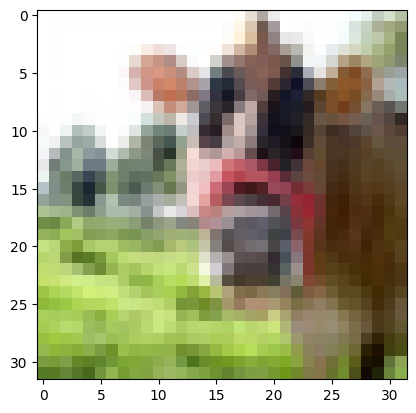

Cai nay la: [19]


In [3]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[0])

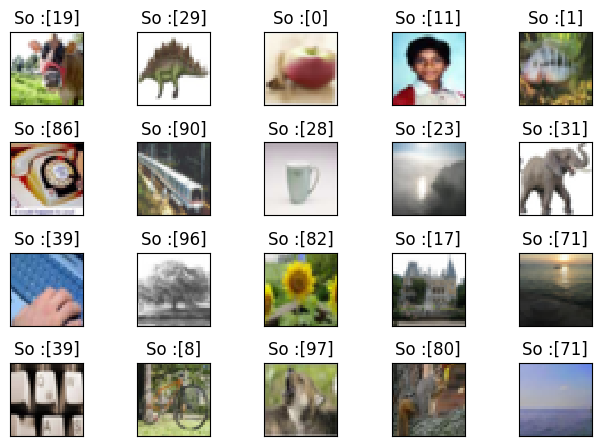

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Sequential()

model.add(Dense(4096, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(2048, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 100)               204900    
                                                                 
Total params: 21,182,564
Trainable params: 21,182,564
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

In [7]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [8]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [11]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 30, batch_size= 1000)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
50/50 [==============================] - 2s 33ms/step - loss: 0.7205 - accuracy: 0.8134
Epoch 2/30
50/50 [==============================] - 2s 31ms/step - loss: 0.5100 - accuracy: 0.8612
Epoch 3/30
50/50 [==============================] - 1s 29ms/step - loss: 0.4879 - accuracy: 0.8645
Epoch 4/30
50/50 [==============================] - 1s 29ms/step - loss: 0.4840 - accuracy: 0.8674
Epoch 5/30
50/50 [==============================] - 1s 29ms/step - loss: 0.4413 - accuracy: 0.8821
Epoch 6/30
50/50 [==============================] - 1s 29ms/step - loss: 0.4419 - accuracy: 0.8788
Epoch 7/30
50/50 [==============================] - 1s 29ms/step - loss: 0.3947 - accuracy: 0.8934
Epoch 8/30
50/50 [==============================] - 1s 29ms/step - loss: 0.3965 - accuracy: 0.8987
Epoch 9/30
50/50 [==============================] - 2s 30ms/step - loss: 0.3929 - accuracy: 0.8895
Epoch 10/30
50/50 [==============================] - 2s 30ms/step - loss: 0.3881 - accuracy: 0.8960
Epoch 11/

In [ ]:
model.save('cifar100.h5')

In [12]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('voi.jpg')
imshow(img)


FileNotFoundError: ignored

In [ ]:
img = load_img('voi.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 96ms/step


array([89])